In [1]:
# !aws s3 cp s3://imageironman/ . --recursive
# !aws s3 cp s3://lowresolutionhighresolution . --recursive

In [1]:
!pip install --upgrade pip
!pip install -U opencv-python
!pip install -q tensorflow-probability
!apt-get upgrade
!apt-get update && apt install -y libsm6 libxext6 ffmpeg libfontconfig1 libxrender1 libgl1-mesa-glx

#!pip install tensorflow

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

print(np.__version__)

/bin/sh: apt-get: command not found
/bin/sh: apt-get: command not found
1.18.5


In [2]:
!pip install --upgrade 
!pip install numpy --upgrade
#!pip uninstall tensorflow 
#!pip install --upgrade tensorflow
#!pip install --upgrade tensorflow-gpu
#print(cv2.__version__)
# !conda install tensorflow-gpu=2.1
!pip install tensorflow==2.3.1


ERROR: You must give at least one requirement to install (see "pip help install")
  Using cached numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.1 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.5 which is incompatible.
tensorflow-serving-api 2.1.0 requires tensorflow~=2.1.0, but you have tensorflow 2.3.1 which is incompatible.
tensorflow-gpu 2.1.3 requires gast==0.2.2, but you have gast 0.3.3 which is incompatible.
tensorflow-gpu 2.1.3 requires keras-preprocessing==1.1.0, but you have keras-preprocessing 1.1.2 which is incompatible.
tensorflow-gpu 2.1.3 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.5 which is incompatible

In [3]:
bucket = 'arn:aws:s3:::imageironman'

import boto3
conn = boto3.client('s3')
response = conn.list_buckets()

# Output the bucket names
print('Existing buckets:')
for bucket in response['Buckets']:
    print(bucket["Name"])
# contents = conn.list_objects(Bucket=bucket)['Contents']
# conn.list_objects(Bucket='lowresolutionhighresolution')

Existing buckets:
aws-emr-resources-128812368847-us-west-2
aws-logs-128812368847-us-west-2
elasticbeanstalk-us-west-2-128812368847
imageironman
lowresolutionhighresolution
raphaelalabi.com
sagemaker-studio-128812368847-4dx6ibast4b
videoimagescartoon


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
np.random.seed(seed=311)

print(np.__version__)
print(tf.__version__)
print(cv2.__version__)

high_res = (512, 512)

def load_data(path,high, low, size):
    high_res_images = []
    low_res_images = []
    count = 0
    
    for (dirname, _, filenames_high_res),(dirname, _, filenames_low_res) in zip(os.walk(path+high) , os.walk(path+low)):
        filenames_high_res.sort()
        filenames_low_res.sort()
        for filename_high,filename_low in zip(filenames_high_res,filenames_low_res):
            #faulty image
            try:
                count+=1
                img = cv2.imread(os.path.join(dirname, filename_high)) # high res == img 
                img_2 = cv2.imread(os.path.join(dirname, filename_low)) # low res == img_2 
                # resizing the images
                width=int(img.shape[1])
                height=int(img.shape[0])
                width_2= int(img_2.shape[1])
                height_2=int(img_2.shape[0])
                if width!= high_res[0] and height != high_res[0]:
                    dsize= high_res
                    img=cv2.resize(img,dsize)
                if width_2!= 256 and height_2 !=256:
                    dsize=(256,256)
                    dsize_1 = (128,128)
                    img_2 = cv2.resize(img_2,dsize_1,interpolation=cv2.INTER_AREA)
                    img_2 = cv2.resize(img_2,dsize,interpolation=cv2.INTER_AREA)
                    img_2 = np.array(img_2)+ np.random.rand(256,256,3)*50
                img = process_image(img)
                img_2 = process_image(img_2)
                high_res_images.append(img)
                low_res_images.append(img_2)
            except:
                continue
            if count >= size:
                break
    # zero-mean and zero-center the standard deviations ....
    low_res_array = np.array(low_res_images)
    #mean_centered_low_res = (low_res_array - low_res_array.mean())/low_res_array.std()
    # zero-mean and zero-center the standard deviations .....
    high_res_array = np.array(high_res_images)
    #mean_centered_high_res = (high_res_array - high_res_array.mean())/high_res_array.std()
    #return mean_centered_low_res, mean_centered_high_res
    return low_res_array,high_res_array
def process_image(image):
    return image/255

1.18.5
2.3.1
4.5.2


In [5]:
gpus = tf.config.list_physical_devices('GPU')
print (gpus)
base_dir = 'Made_Folders_2/'
#base_dir = 'dataset/'

train_size = 10000
val_size = 1000

if base_dir == 'Made_Folders_2/':
    train_x, train_y =  load_data(base_dir + 'Training/', 'HIGH', 'LOW', train_size)
    val_x, val_y = load_data(base_dir + 'Validationing/',  'HIGH', 'LOW', val_size)
elif base_dir == 'dataset/':
    train_x, train_y =  load_data(base_dir + 'train/', 'high_res', 'low_res', train_size)
    val_x, val_y = load_data(base_dir + 'val/',  'high_res', 'low_res',  val_size)    
    
#train_x = train_x + np.random.rand(train_x.shape[0], train_x.shape[1], train_x.shape[2], train_x.shape[3])*.2
#val_x = val_x + np.random.rand(val_x.shape[0], val_x.shape[1], val_x.shape[2], val_x.shape[3])*.2


print (tf.__version__)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:4', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:5', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:6', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:7', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:8', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:9', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:10', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:11', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:12', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:13', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:14', device_type='GPU'), Phys

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(9999, 256, 256, 3) (9999, 512, 512, 3)
[[0.23030182 0.18029489 0.19119657]
 [0.23236631 0.13128762 0.16773473]
 [0.20674101 0.18594085 0.21074051]
 [0.1883834  0.20840712 0.17717976]
 [0.20280581 0.14728081 0.21427161]
 [0.19676907 0.16598462 0.08397783]
 [0.27875049 0.1685228  0.17099472]
 [0.2447208  0.30330454 0.06799024]
 [0.25639735 0.17218286 0.20753773]
 [0.23647594 0.2647981  0.17162485]] [[0.1372549  0.09019608 0.04313725]
 [0.1372549  0.09019608 0.04313725]
 [0.14117647 0.09411765 0.04705882]
 [0.14117647 0.09411765 0.04705882]
 [0.14509804 0.09803922 0.05098039]
 [0.14509804 0.09803922 0.05098039]
 [0.14901961 0.10588235 0.05098039]
 [0.15686275 0.10588235 0.04705882]
 [0.16470588 0.10980392 0.04705882]
 [0.16862745 0.10980392 0.04705882]]


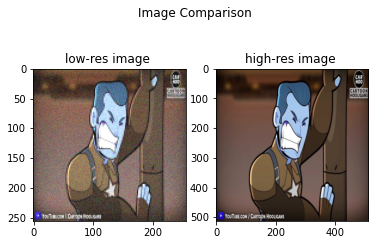

In [6]:
train_x.shape
assert (train_x.shape[0] == train_y.shape[0]), (f"{train_x.shape[0]} {train_y.shape[0]}")
print (train_x.shape, train_y.shape)
# print (train_x[0])

print (train_x[0, 0, 0:10, :], train_y[0, 0, 0:10, :])
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Image Comparison')
ax1.imshow(train_x[0])
ax1.title.set_text("low-res image ")
ax2.imshow(train_y[0])
ax2.title.set_text("high-res image ")






CONSTANT FEATURES WITH SKIP CONNECTIONS  
Used combination of perceptual loss and MSE loss from SRGAN paper - 
https://github.com/tensorlayer/srgan/blob/9721adce6a2ee51a56aaf0b319b89d35836f57e6/train.py#L124

Also inspired from : https://www.tensorflow.org/guide/keras/custom_layers_and_models

    
    
    

In [7]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, UpSampling2D, add, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import tensorflow as tf

# This class creates a scmple given a mean and variance - assuming a Gaussian distribution
##########################################################################################
##########################################################################################
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    @tf.function
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
##########################################################################################
##########################################################################################

latent_dim = 512
dense_dim = 256
input_shape = (256, 256, 3)

# Encoder network 
encoder_inputs = keras.Input(shape=input_shape)  
l1 = layers.Conv2D(64, 3, activation="relu", strides=1, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(encoder_inputs) # input shape 256,256,3
#l1 = layers.BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001)(l1)
l1 = layers.Dropout(0.3)(l1)
l1 = layers.MaxPooling2D((2,2), strides=2)(l1)

l1 = layers.Conv2D(64, 3, activation="relu", strides=1, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l1) # input shape 256,256,3
l1 = layers.Dropout(0.3)(l1)
#l1 = layers.BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001)(l1)
l1 = layers.MaxPooling2D((2,2), strides=2)(l1)

l2 = layers.Conv2D(128, 3, activation="relu", strides=1, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l1) # input shape 256,256,3
l2 = layers.Dropout(0.3)(l2)
#l2 = layers.BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001)(l2)
l2 = layers.MaxPooling2D((2,2), strides=2)(l2)

l2 = layers.Conv2D(128, 3, activation="relu", strides=1, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l2) # input shape 256,256,3
l2 = layers.Dropout(0.3)(l2)
#l2 = layers.BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001)(l2)

l2 = layers.Conv2DTranspose(128, 3, activation="relu", strides=2, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l2) #256,256,32
l2 = layers.Conv2DTranspose(128, 3, activation="relu", strides=2, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l2) #256,256,32

l2 = layers.Conv2D(64, 3, activation="relu", strides=1, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l2) #input shape 128,128,64
l2 = layers.Dropout(0.3)(l2)
# l2 = layers.BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001)(l2)
l2 = layers.MaxPooling2D((2,2), strides=2)(l2)

l3 = layers.Add()([l2, l1])

l3 = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l3) #input shape 128,128,64
#l3 = layers.BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001)(l3)
#l3 = layers.MaxPooling2D((2,2), strides=2)(l3)

l5 = layers.Flatten()(l3)
l5 = layers.Dense(dense_dim, activation="relu", kernel_initializer=tf.initializers.GlorotUniform())(l5) # best if this dimension is greater than the latent_dim simension

z_mean = layers.Dense(latent_dim, name="z_mean", kernel_initializer=tf.initializers.GlorotUniform())(l5)
z_log_var = layers.Dense(latent_dim, name="z_log_var", kernel_initializer=tf.initializers.GlorotUniform())(l5)
z = Sampling()([z_mean, z_log_var])

encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           dropout[0][0]                    
____________________________________________________________________________________________

In [8]:
latent_inputs = keras.Input(shape=(latent_dim, ))

dense_dim = (32, 32, 32)

l10 = layers.Dense(dense_dim[0] * dense_dim[1] * dense_dim[2] , activation="relu")(latent_inputs)
l10 = layers.Reshape((dense_dim[0], dense_dim[1], dense_dim[2]))(l10) #shape is 64,64,64

#l11 = layers.BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001)(l10)
l11 = layers.Dropout(0.3)(l10)
l11 = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l11) #64,128,128

#l11 = layers.BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001)(l10)
l11 = layers.Dropout(0.3)(l11)
l11 = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l11) #64,128,128

#l11 = layers.BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001)(l11)
l11 = layers.Dropout(0.3)(l11)
l11 = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l11) #64,128,128

#l12 = layers.BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001)(l11)
l12 = layers.Dropout(0.3)(l11)
l12 = layers.Conv2DTranspose(128, 3, activation="relu", strides=1, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l12) #256,256,64

#l12 = layers.BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001)(l12)
l12 = layers.Dropout(0.3)(l12)
l12 = layers.Conv2DTranspose(256, 3, activation="relu", strides=1, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l12) #256,256,64

#l13 = layers.BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001)(l12)
l13 = layers.Dropout(0.3)(l12)
l13 = layers.Conv2D(128, 3, activation="relu", strides=1, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l13) #256,256,32

l14 = layers.Conv2D(64, 3, activation="relu", strides=1, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l13) #256,256,32
l15 = layers.Add()([l11, l14])

l15 = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l15) #256,256,64
# l15 = layers.Conv2D(32, 3, activation="relu", strides=1, padding="same")(l15) #256,256,32
l15 = layers.Conv2D(16, 3, activation="relu", strides=1, padding="same", kernel_initializer=tf.initializers.GlorotUniform())(l15) #256,256,32

decoder_outputs = layers.Conv2D(3, 3, activation="relu", padding="same")(l15) #256,256,3

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


Model: "decoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512)]        0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 32768)        16809984    input_2[0][0]                    
__________________________________________________________________________________________________
reshape (Reshape)               (None, 32, 32, 32)   0           dense_1[0][0]                    
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 32, 32, 32)   0           reshape[0][0]                    
____________________________________________________________________________________________

In [9]:


class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, kl_multiplier, perceptual_loss_multiplier,  **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")
        self.perceptual_loss = keras.metrics.Mean(name="perceptual_loss")
        self.ssim = keras.metrics.Mean(name='ssim')
        self.psnr = keras.metrics.Mean(name='psnr')
        
        self.loss_fn = tf.keras.losses.MeanSquaredError()
        self.perceptual_loss_fn =  tf.keras.losses.MeanSquaredError()
        
        self.kl_multiplier = kl_multiplier
        self.perceptual_loss_multiplier = perceptual_loss_multiplier
        
        self.optimizer = keras.optimizers.Adam(1e-4)
        
        self.vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet', input_tensor=None,
                                               input_shape=(256, 256, 3), pooling=None, classes=1000,)
        self.vgg.trainable = False
                                              
    
    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
            self.perceptual_loss,
            self.ssim, 
            self.psnr,
        ]
    
    @tf.function
    def compute_ssim(self, original_image, generated_image):
        #original_image = tf.convert_to_tensor(original_image, dtype = tf.float32)
        #generated_image = tf.convert_to_tensor(generated_image, dtype = tf.float32)
        ssim = tf.image.ssim(original_image, generated_image, max_val = 1.0, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, )
        return tf.math.reduce_mean(ssim, axis = None, keepdims = False, name = None)
    
    @tf.function
    def compute_psnr(self, original_image, generated_image):
        #original_image = tf.convert_to_tensor(original_image, dtype = tf.float32)
        #generated_image = tf.convert_to_tensor(generated_image, dtype = tf.float32)
        psnr = tf.image.psnr(original_image, generated_image, max_val = 1.0)
        return tf.math.reduce_mean(psnr, axis = None, keepdims = False, name = None)
    
    @tf.function
    def call(self, data, training=False):
        
        z_mean, z_log_var, z = self.encoder(data, training=training)
        reconstruction = self.decoder(z, training=training)
            
        #if training:
        #    return reconstruction
        #else:    
        return (z_mean,z_log_var,z, reconstruction)
    
    @tf.function
    def get_loss(self, data, training=False):
        #z_mean, z_log_var, z = self.encoder(data[0], training) 
        #reconstruction = self.decoder(z, training)
        
        z_mean, z_log_var, z, reconstruction = self.call(data[0], training)
        
        reconstruction_loss = self.loss_fn(data[1], reconstruction)
        # print (reconstruction_loss)
        
        vgg_good = self.vgg(data[1])
        vgg_reconst = self.vgg(reconstruction)
        perceptual_loss1 =  self.perceptual_loss_fn(vgg_good, vgg_reconst)
        # perceptual_loss1 = 0
            
        perceptual_loss2 = 0 # tf.reduce_mean(tf.keras.losses.MSE(vgg.layers[6].output, vgg.layers[6].output)) 
        perceptual_loss = perceptual_loss1 + perceptual_loss2
        perceptual_loss = perceptual_loss * self.perceptual_loss_multiplier
                
        kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1)) 
        kl_loss = kl_loss * self.kl_multiplier
        #kl_loss = tf.keras.losses.KLDivergence(data[1], reconstruction)
            
        total_loss = reconstruction_loss + kl_loss + perceptual_loss
        
        ssim = self.compute_ssim(data[1], reconstruction)
        psnr = self.compute_psnr(data[1], reconstruction)
        
        return total_loss, reconstruction_loss, perceptual_loss, kl_loss, ssim, psnr,reconstruction
    
    @tf.function
    def test_step(self, data):
        total_loss, reconstruction_loss, perceptual_loss, kl_loss, ssim, psnr,reconstruction = self.get_loss(data, training=False)
        
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        self.perceptual_loss.update_state(perceptual_loss)
        self.ssim.update_state(ssim)
        self.psnr.update_state(psnr)
        
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
            "perceptual_loss" : self.perceptual_loss.result(),
            'ssim' : self.ssim.result(),
            'psnr' : self.psnr.result(),
        }
        
    @tf.function
    def train_step(self, data):
        with tf.GradientTape() as tape:
            total_loss, reconstruction_loss, perceptual_loss, kl_loss, ssim, psnr,reconstruction = self.get_loss(data, training=True)
             
        trainable_weights = self.encoder.trainable_weights + self.decoder.trainable_weights
        grads = tape.gradient(total_loss, trainable_weights)
        self.optimizer.apply_gradients(zip(grads, trainable_weights))
        
        
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        self.perceptual_loss.update_state(perceptual_loss)
        self.ssim.update_state(ssim)
        self.psnr.update_state(psnr)            
        
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
            "perceptual_loss" : self.perceptual_loss.result(),
            'ssim' : self.ssim.result(),
            'psnr' : self.psnr.result(),
        }
    
keras.backend.clear_session()
model = None
model = VAE(encoder, decoder, kl_multiplier=1e-5, perceptual_loss_multiplier=1e-6)

model.compile(loss=None)

In [10]:
def train(model, train_x, train_y,  val_x, val_y, epochs = 1, batch_size = 32, shuffle = False):
    return model.fit(train_x, train_y,epochs=epochs, validation_data=(val_x, val_y), batch_size=batch_size,shuffle=shuffle) 

In [16]:

_, _, _, val_pred = model(val_x[0:1])

model.train_on_batch(train_x[:1], train_y[:1])

model.load_weights("vae_model_256_to_512_weights")

history_vae_256_to_512 = train(model, train_x, train_y, val_x, val_y, epochs = 2, batch_size = 8, shuffle = True)
# model.save("vae_model_256_to_512", )
# model.save_weights("vae_model_256_to_512_weights", overwrite=True)
# np.save('history_vae_256_to_512_11.npy', history_vae_256_to_512_11.history)
                                        






If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/2
 109/1250 [=>............................] - ETA: 1:04:41 - loss: 0.0182 - reconstruction_loss: 0.0162 - kl_loss: 0.0019 - perceptual_loss: 6.2498e-08 - ssim: 0.6245 - psnr: 19.0018

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


New PSNR:17.090059280395508 SSIM:0.49504438042640686


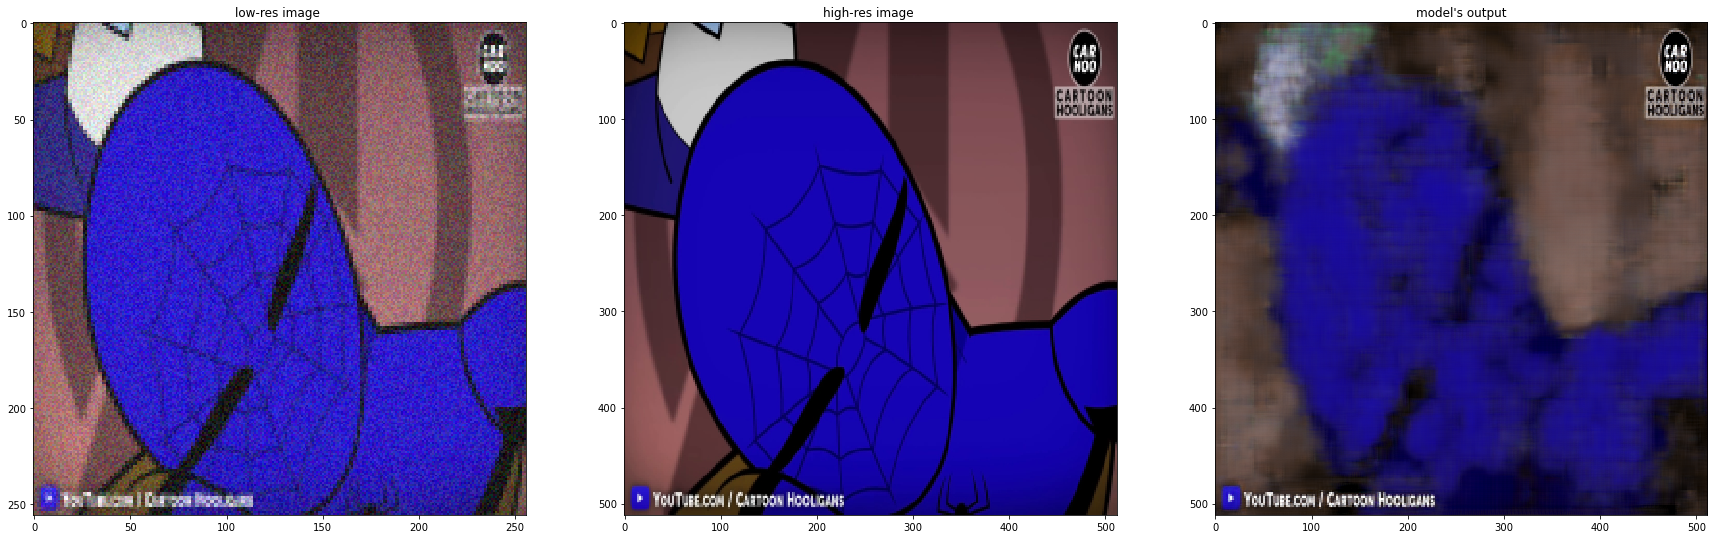

<Figure size 2880x2880 with 0 Axes>

In [14]:
def compute_psnr(original_image, generated_image):
    original_image = tf.convert_to_tensor(original_image, dtype = tf.float32)
    generated_image = tf.convert_to_tensor(generated_image, dtype = tf.float32)
    psnr = tf.image.psnr(original_image, generated_image, max_val = 1.0)
    return tf.math.reduce_mean(psnr, axis = None, keepdims = False, name = None)

def compute_ssim(original_image, generated_image):
    original_image = tf.convert_to_tensor(original_image, dtype = tf.float32)
    generated_image = tf.convert_to_tensor(generated_image, dtype = tf.float32)
    ssim = tf.image.ssim(original_image, generated_image, max_val = 1.0, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, )
    return tf.math.reduce_mean(ssim, axis = None, keepdims = False, name = None)

# del.train_on_batch(train_x[:1], train_y[:1])
#odel.load_weights("vae_model_256_to_512_weights")
model = tf.keras.models.load_model("vae_model_256_to_512")
_, _,_, train_pred = model(val_x[0:1],)

#print (f"Original PSNR:{compute_psnr(train_x[0], train_y[0])} SSIM:{compute_ssim(train_x[0], train_y[0])}")
print (f"New PSNR:{compute_psnr(val_pred[0], val_y[0])} SSIM:{compute_ssim(train_pred[0], train_y[0])}")


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,30))
plt.figure(figsize=(40,40))
interpolation = 'None'
ax1.imshow(val_x[0], interpolation=interpolation)
ax1.title.set_text("low-res image ")
ax2.imshow(val_y[0], interpolation=interpolation)
ax2.title.set_text("high-res image ")
ax3.imshow(val_pred[0], interpolation=interpolation)
ax3.title.set_text("model's output")
#print (val_x[0, 0, 0, :], train_y[0, 0, 0, :])
#print (train_pred[0, 0, 0, :], train_y[0, 0, 0, :])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


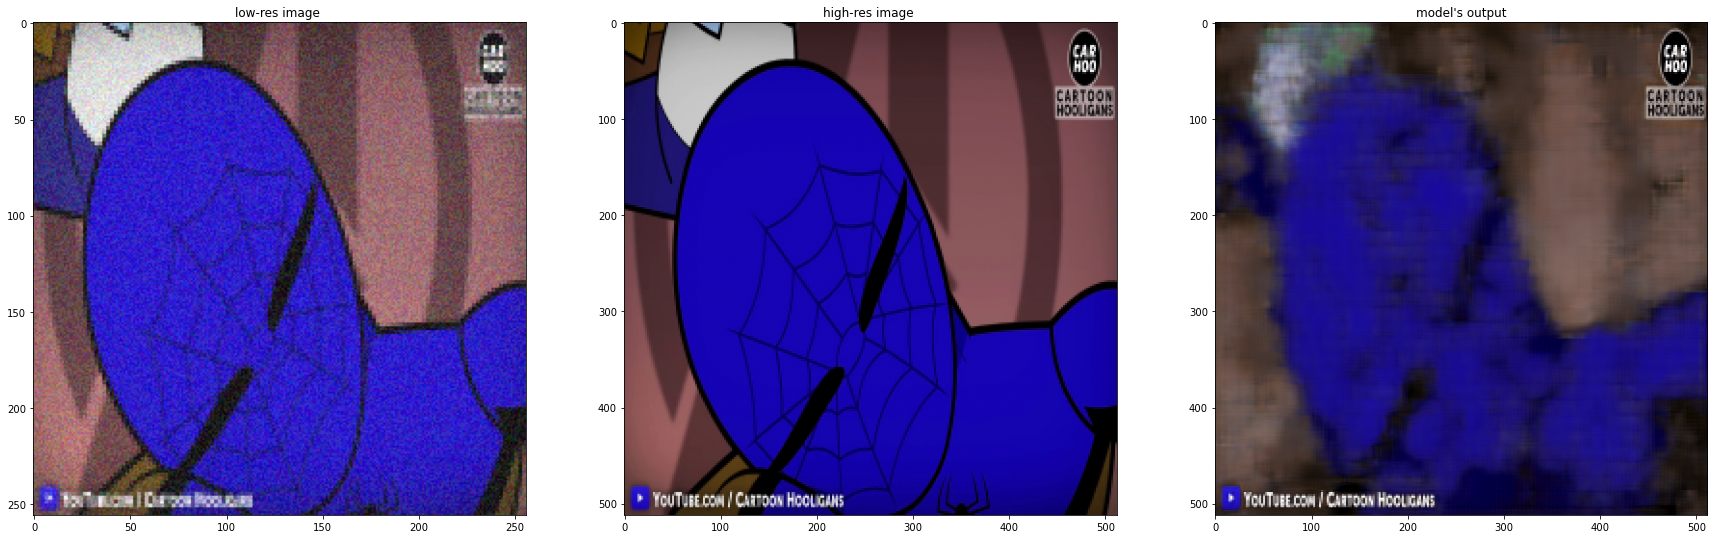

<Figure size 2880x2880 with 0 Axes>

In [11]:
model = tf.keras.models.load_model("vae_model_256_to_512")
# model.load_weights("vae_model_256_to_512_weights")
_, _, _, val_pred = model((val_x[0:1]), training=False)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,30))
plt.figure(figsize=(40,40))
ax1.imshow(val_x[0])
ax1.title.set_text("low-res image ")
ax2.imshow(val_y[0])
ax2.title.set_text("high-res image ")
ax3.imshow(val_pred[0])
ax3.title.set_text("model's output")

In [91]:
history1=np.load('history1.npy',allow_pickle='TRUE').item()
print(history1) 

{'loss': [0.03711843863129616], 'reconstruction_loss': [0.036825574934482574], 'kl_loss': [0.0002928292960859835], 'perceptual_loss': [0.0], 'ssim': [0.33675962686538696], 'psnr': [14.80213737487793], 'val_loss': [array([[[0.01580964, 0.01216558, 0.0109697 , ..., 0.01471807,
         0.01402963, 0.01550652],
        [0.00760819, 0.00499962, 0.0046685 , ..., 0.00521861,
         0.00502465, 0.00576179],
        [0.00483033, 0.00237942, 0.00263   , ..., 0.0027763 ,
         0.00238248, 0.00351574],
        ...,
        [0.05387571, 0.04589289, 0.03802215, ..., 0.05389353,
         0.05110044, 0.05467881],
        [0.06151481, 0.05414837, 0.04881481, ..., 0.05985176,
         0.05462456, 0.06052764],
        [0.06670881, 0.06481685, 0.06686177, ..., 0.07019015,
         0.06909457, 0.06742907]],

       [[0.01775421, 0.01248608, 0.01185946, ..., 0.01482673,
         0.01244953, 0.01407541],
        [0.00747092, 0.00505108, 0.00341153, ..., 0.00621828,
         0.00521165, 0.00656099],
   

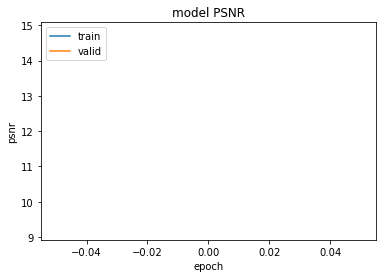

In [92]:
plt.plot(history1['psnr'])
plt.plot(history1['val_psnr'])
plt.title('model PSNR')
plt.ylabel('psnr')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [25]:
import pandas as pd 
from sklearn.decomposition import PCA

N, H, W, C = train_x.shape

train_x_flat = train_x.reshape(-1, H * W * C)
features = ['pixels' + str(i) for i in range(H * W * C)]

df_train_x_flat = pd.DataFrame(train_x_flat, columns=features)

pca_train_x_flat = PCA(0.99)
#pca_final = pca_train_x_flat.fit_transform(df_train_x_flat.iloc[:,:-1])
pca_train_x_flat.fit(train_x_flat)


PCA(n_components=0.99)

In [26]:
pca_train_x_flat.n_components_

5175

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


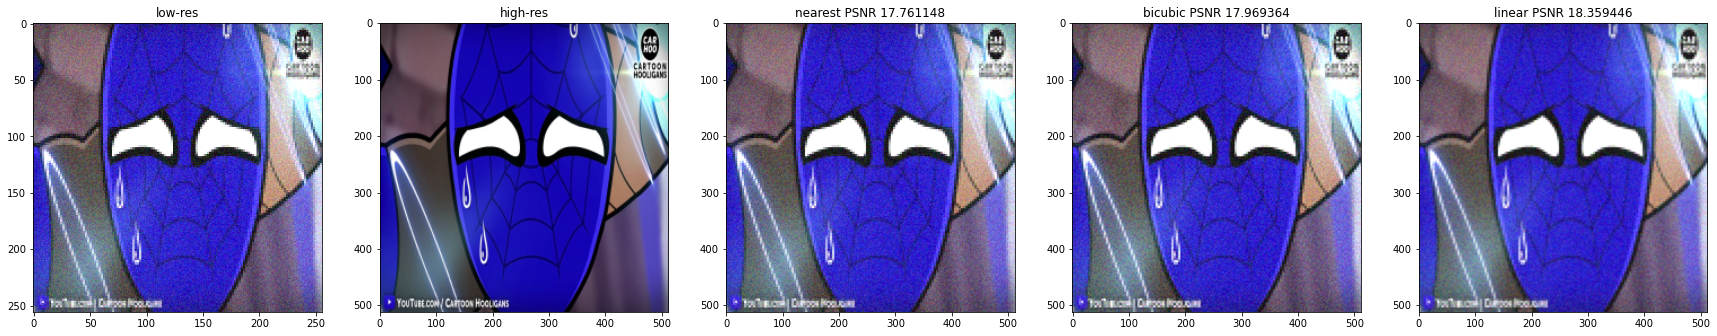

<Figure size 2880x2880 with 0 Axes>

In [18]:

# model = tf.keras.models.load_model("vae_model_256_to_512")
# _, _, _ , pred = model(train_x[0:1], )

def compute_ssim(original_image, generated_image):
        original_image = tf.convert_to_tensor(original_image, dtype = tf.float32)
        generated_image = tf.convert_to_tensor(generated_image, dtype = tf.float32)
        ssim = tf.image.ssim(original_image, generated_image, max_val = 1.0, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, )
        return tf.math.reduce_mean(ssim, axis = None, keepdims = False, name = None)
    
def compute_psnr(original_image, generated_image):
        original_image = tf.convert_to_tensor(original_image, dtype = tf.float32)
        generated_image = tf.convert_to_tensor(generated_image, dtype = tf.float32)
        psnr = tf.image.psnr(original_image, generated_image, max_val = 1.0)
        return tf.math.reduce_mean(psnr, axis = None, keepdims = False, name = None)


inter = [ cv2.INTER_NEAREST, cv2.INTER_CUBIC, cv2.INTER_LINEAR,]
inter_string = ['nearest',  'bicubic', 'linear',]
img_idx = 2000


fig, ax = plt.subplots(1, 2 + len(inter), figsize=(30,30))
plt.figure(figsize=(40,40))
ax[0].imshow(train_x[img_idx])
ax[0].title.set_text("low-res")
ax[1].imshow(train_y[img_idx])
ax[1].title.set_text("high-res")

for idx, inter in enumerate(inter):
    img = cv2.resize(train_x[img_idx], (512, 512), interpolation=inter)
    (ax)[idx + 2].imshow(img)# , interpolation=inter)
    ax[idx+2].title.set_text(inter_string[idx] + " PSNR " + str(compute_psnr(img, train_y[img_idx]).numpy()))
